In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from google.colab import files
files.upload()

Saving boston.csv to boston.csv


{'boston.csv': b'CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV\n0.00632,18.00,2.310,0,0.5380,6.5750,65.20,4.0900,1,296.0,15.30,396.90,4.98,24.00\n0.02731,0.00,7.070,0,0.4690,6.4210,78.90,4.9671,2,242.0,17.80,396.90,9.14,21.60\n0.02729,0.00,7.070,0,0.4690,7.1850,61.10,4.9671,2,242.0,17.80,392.83,4.03,34.70\n0.03237,0.00,2.180,0,0.4580,6.9980,45.80,6.0622,3,222.0,18.70,394.63,2.94,33.40\n0.06905,0.00,2.180,0,0.4580,7.1470,54.20,6.0622,3,222.0,18.70,396.90,5.33,36.20\n0.02985,0.00,2.180,0,0.4580,6.4300,58.70,6.0622,3,222.0,18.70,394.12,5.21,28.70\n0.08829,12.50,7.870,0,0.5240,6.0120,66.60,5.5605,5,311.0,15.20,395.60,12.43,22.90\n0.14455,12.50,7.870,0,0.5240,6.1720,96.10,5.9505,5,311.0,15.20,396.90,19.15,27.10\n0.21124,12.50,7.870,0,0.5240,5.6310,100.00,6.0821,5,311.0,15.20,386.63,29.93,16.50\n0.17004,12.50,7.870,0,0.5240,6.0040,85.90,6.5921,5,311.0,15.20,386.71,17.10,18.90\n0.22489,12.50,7.870,0,0.5240,6.3770,94.30,6.3467,5,311.0,15.20,392.52,20.45,15.00\n0.11747,12.50,7.

In [ ]:
df = pd.read_csv('boston.csv')

In [ ]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [ ]:
df.shape

(506, 14)

In [ ]:
# CRIM: per capita crime rate by town
# ZN: proportion of residential land zoned for lots over 25 000 sq. ft.
# INDUS: proportion of non-retail business acres per town 
# CHAS: Charles River dummy variable (=1 if tract bounds river; 0 otherwise)
# NOX: nitric oxides concentration (parts per 10 million)
# RM: average numbers of rooms per dewlling 
# AGE: proportion of owner-occupied units built prior to 1940
# DIS: weighted distances to five Boston employment centres
# RAD: index of accessibility to radial highways
# TAX: full-value property-tax rate per $10000
# PTRATIO: pupil-teacher ratio by town
# B: Uses equation B=1000(Bk-0.63)^2 where Bk is proportion of blacks by town
# LSTAT: % lower status of the population

# MEDV: median value of owner-occupied homes in $1000's

In [ ]:
df.corr()['MEDV'].sort_values(ascending=False)

MEDV       1.000000
RM         0.695360
ZN         0.360445
B          0.333461
DIS        0.249929
CHAS       0.175260
AGE       -0.376955
RAD       -0.381626
CRIM      -0.388305
NOX       -0.427321
TAX       -0.468536
INDUS     -0.483725
PTRATIO   -0.507787
LSTAT     -0.737663
Name: MEDV, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


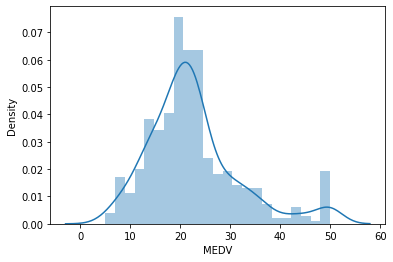

In [ ]:
sns.distplot(df['MEDV'])

In [ ]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

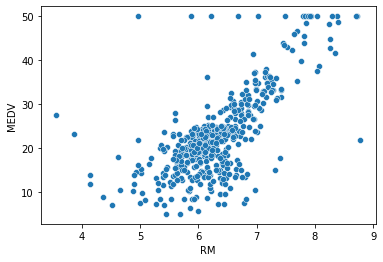

In [ ]:
sns.scatterplot(data=df,x='RM',y='MEDV')

In [ ]:
# Starting ML Model

In [ ]:
X = df.drop('MEDV',axis=1).values
y = df['MEDV'].values

In [ ]:
X.shape

(506, 13)

In [ ]:
from sklearn.model_selection import train_test_split 

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler()

In [ ]:
X_train = scaler.fit_transform(X_train)

In [ ]:
X_train.max()

1.0000000000000002

In [ ]:
X_test = scaler.transform(X_test)

In [ ]:
X_test.max()

1.1478180091225068

In [ ]:
# Create neural network

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
X_train.shape

(354, 13)

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss',mode = 'min',verbose=1,patience=25)

In [ ]:
model = Sequential()
model.add(Dense(13,activation='relu'))
model.add(Dense(13,activation='relu'))
model.add(Dense(13,activation='relu'))

model.add(Dense(1))
model.compile(optimizer='adam',loss='mse')

In [ ]:
model.fit(x=X_train,y=y_train,validation_data=(X_test,y_test),batch_size=128,epochs=400,callbacks = [early_stop])

Epoch 1/400
3/3 [==============================] - 1s 81ms/step - loss: 630.4285 - val_loss: 535.6977
Epoch 2/400
3/3 [==============================] - 0s 18ms/step - loss: 627.3279 - val_loss: 532.9211
Epoch 3/400
3/3 [==============================] - 0s 18ms/step - loss: 624.3983 - val_loss: 530.2002
Epoch 4/400
3/3 [==============================] - 0s 19ms/step - loss: 621.4565 - val_loss: 527.4882
Epoch 5/400
3/3 [==============================] - 0s 19ms/step - loss: 618.4208 - val_loss: 524.7490
Epoch 6/400
3/3 [==============================] - 0s 18ms/step - loss: 615.4000 - val_loss: 521.9393
Epoch 7/400
3/3 [==============================] - 0s 16ms/step - loss: 612.2479 - val_loss: 519.0500
Epoch 8/400
3/3 [==============================] - 0s 15ms/step - loss: 609.1066 - val_loss: 516.0702
Epoch 9/400
3/3 [==============================] - 0s 17ms/step - loss: 605.8906 - val_loss: 513.0220
Epoch 10/400
3/3 [==============================] - 0s 17ms/step - loss: 602.5623 

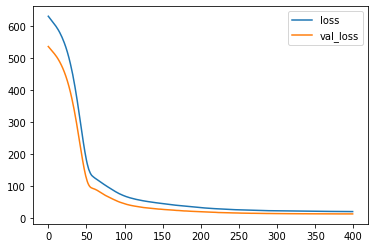

In [ ]:
# Let's evaluate the model
pd.DataFrame(model.history.history).plot()

In [ ]:
df.describe()['MEDV']

count    506.000000
mean      22.532806
std        9.197104
min        5.000000
25%       17.025000
50%       21.200000
75%       25.000000
max       50.000000
Name: MEDV, dtype: float64

In [ ]:
predictions = model.predict(X_test)

In [ ]:
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error, explained_variance_score

In [ ]:
print("MAPE: " + str(mean_absolute_percentage_error(y_test,predictions)))
print("RMSE: " + str(mean_squared_error(y_test,predictions)**0.5))
print("EVS: " + str(explained_variance_score(y_test,predictions)))

MAPE: 0.1436410442256011
RMSE: 3.4337172824360698
EVS: 0.8095678024905169


In [ ]:
from tensorflow.keras.models import load_model
model.save('boston_housing_linear_regression2.h5')

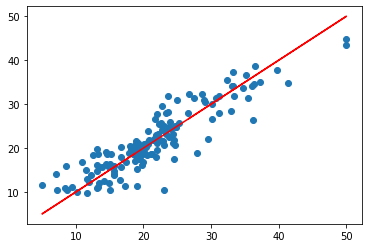

In [ ]:
plt.scatter(x=y_test,y=predictions)
plt.plot(y_test,y_test,'r')

In [ ]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [ ]:
# Now I'm going to try regression with Decision Trees, Random Forests, 
# KNN's and Support Vector Machines

In [ ]:
# Let's try regression with Decision Trees

In [ ]:
X = df.drop('MEDV',axis=1).values
y = df['MEDV'].values

In [ ]:
X.shape

(506, 13)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

In [ ]:
from sklearn.tree import DecisionTreeRegressor
dtree = DecisionTreeRegressor()

In [ ]:
dtree.fit(X_train,y_train)

DecisionTreeRegressor()

In [ ]:
dtree_predictions = dtree.predict(X_test)

In [ ]:
print("MAPE: " + str(mean_absolute_percentage_error(y_test,dtree_predictions)))
print("RMSE: " + str(mean_squared_error(y_test,dtree_predictions)**0.5))
print("EVS: " + str(explained_variance_score(y_test,dtree_predictions)))

MAPE: 0.13733162340731792
RMSE: 3.3918051396362907
EVS: 0.8685272873944645


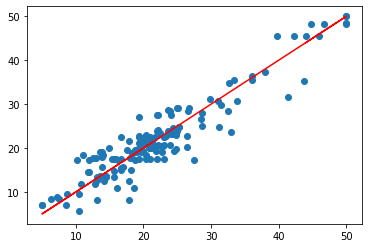

In [ ]:
plt.scatter(x=y_test,y=dtree_predictions)
plt.plot(y_test,y_test,'r')

In [ ]:
from tensorflow.keras.models import load_model
dtree.save('boston_housing_dtree_regression.h5')
# This doesn't work

AttributeError: ignored

In [ ]:
import pickle
pickle.dump(dtree,open('boston_housing_dtree_regression_attempt2.h5','wb'))

In [ ]:
# Let's try Random Forests

In [ ]:
X = df.drop('MEDV',axis=1).values
y = df['MEDV'].values 

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
rfc = RandomForestRegressor(n_estimators=100)

In [ ]:
rfc.fit(X_train,y_train)

RandomForestRegressor()

In [ ]:
rfc_predictions= rfc.predict(X_test)

In [ ]:
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error,explained_variance_score
print("MAPE: " + str(mean_absolute_percentage_error(y_test,rfc_predictions)))
print("RMSE: " + str(mean_squared_error(y_test,rfc_predictions)**0.5))
print("EVS: " + str(explained_variance_score(y_test,rfc_predictions)))

MAPE: 0.13210784763057476
RMSE: 3.6261171037350692
EVS: 0.8544538460044814


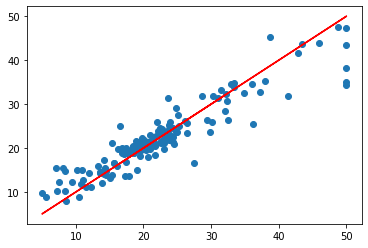

In [ ]:
plt.scatter(x=y_test,y=rfc_predictions)
plt.plot(y_test,y_test,'r')

In [ ]:
import pickle
pickle.dump(rfc,open('boston_housing_rfc_regression.h5','wb'))

In [ ]:
# Let's try regression with KNN

In [ ]:
X = df.drop('MEDV',axis=1).values
y = df['MEDV'].values 

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

In [ ]:
knn = KNeighborsRegressor(n_neighbors=1)
knn.fit(X_train,y_train)
knn_predictions = knn.predict(X_test)

In [ ]:
print("MAPE: " + str(mean_absolute_percentage_error(y_test,knn_predictions)))
print("RMSE: " + str(mean_squared_error(y_test,knn_predictions)**0.5))
print("EVS: " + str(explained_variance_score(y_test,knn_predictions)))

MAPE: 0.21594318403246363
RMSE: 7.707160887601116
EVS: 0.3856262713721902


In [ ]:
error_rate = []
for i in range(1,60):

    knn = KNeighborsRegressor(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(mean_squared_error(y_test,knn_predictions)**0.5)

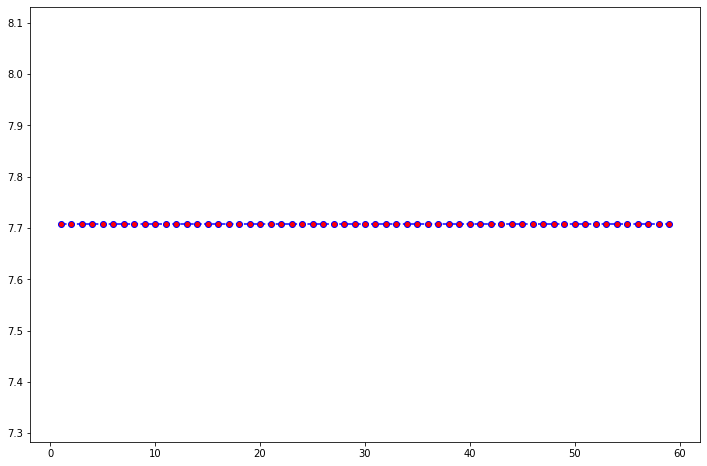

In [ ]:
plt.figure(figsize=(12,8))
plt.plot(range(1,60),error_rate,color='blue',linestyle='--',marker='o',markerfacecolor='red')

In [ ]:
knn = KNeighborsRegressor(n_neighbors=20)
knn.fit(X_train,y_train)
knn_predictions = knn.predict(X_test)

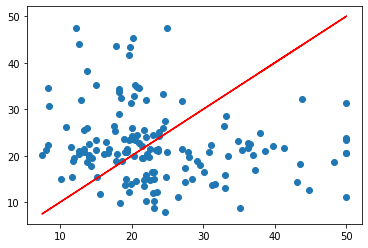

In [ ]:
plt.scatter(x=y_test,y=rfc_predictions)
plt.plot(y_test,y_test,'r')

In [ ]:
# KNN doesn't work well
import pickle
pickle.dump(knn,open('boston_housing_knn_regression.h5','wb'))

In [ ]:
# Let's try regression with SVM

In [ ]:
X = df.drop('MEDV',axis=1).values
y = df['MEDV'].values 

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

In [ ]:
from sklearn.svm import SVR
SVR = SVR()
SVR.fit(X_train,y_train)

SVR()

In [ ]:
SVR_predictions = SVR.predict(X_test)

In [ ]:
print("MAPE: " + str(mean_absolute_percentage_error(y_test,SVR_predictions)))
print("RMSE: " + str(mean_squared_error(y_test,SVR_predictions)**0.5))
print("EVS: " + str(explained_variance_score(y_test,SVR_predictions)))

MAPE: 0.24461523242042504
RMSE: 8.619760812171577
EVS: 0.28697000327212374


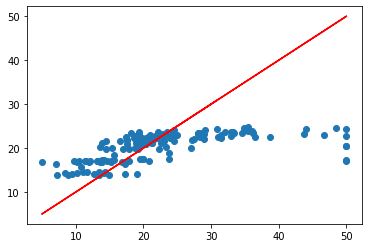

In [ ]:
plt.scatter(x=y_test,y=SVR_predictions)
plt.plot(y_test,y_test,'r')

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C':[0.1,1,10,100,1000],'gamma':[1,0.1,0.01,0.001,0.0001]}
grid = GridSearchCV(SVR,param_grid,verbose=3)
grid.fit(X_train,y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ...................C=0.1, gamma=1;, score=-0.003 total time=   0.0s
[CV 2/5] END ...................C=0.1, gamma=1;, score=-0.037 total time=   0.0s
[CV 3/5] END ...................C=0.1, gamma=1;, score=-0.049 total time=   0.0s
[CV 4/5] END ...................C=0.1, gamma=1;, score=-0.002 total time=   0.0s
[CV 5/5] END ...................C=0.1, gamma=1;, score=-0.034 total time=   0.0s
[CV 1/5] END .................C=0.1, gamma=0.1;, score=-0.002 total time=   0.0s
[CV 2/5] END .................C=0.1, gamma=0.1;, score=-0.036 total time=   0.0s
[CV 3/5] END .................C=0.1, gamma=0.1;, score=-0.046 total time=   0.0s
[CV 4/5] END ..................C=0.1, gamma=0.1;, score=0.000 total time=   0.0s
[CV 5/5] END .................C=0.1, gamma=0.1;, score=-0.033 total time=   0.0s
[CV 1/5] END .................C=0.1, gamma=0.01;, score=0.020 total time=   0.0s
[CV 2/5] END ................C=0.1, gamma=0.01;

GridSearchCV(estimator=SVR(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001]},
             verbose=3)

In [ ]:
grid.best_params_

{'C': 1000, 'gamma': 0.0001}

In [ ]:
grid_predictions = grid.predict(X_test)

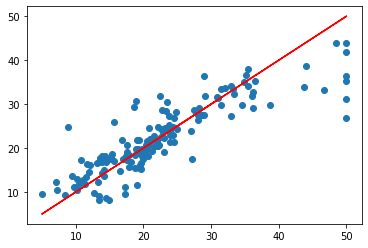

In [ ]:
plt.scatter(x=y_test,y=grid_predictions)
plt.plot(y_test,y_test,'r')

In [ ]:
print("MAPE: " + str(mean_absolute_percentage_error(y_test,grid_predictions)))
print("RMSE: " + str(mean_squared_error(y_test,grid_predictions)**0.5))
print("EVS: " + str(explained_variance_score(y_test,grid_predictions)))

MAPE: 0.1717672557319278
RMSE: 5.022854825197963
EVS: 0.7415150583622294


In [ ]:
import pickle
pickle.dump(grid,open('boston_housing_SVM_gridsearch_regression.h5','wb'))